In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.datasets import fetch_california_housing

# Load the California Housing Dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
print(df.head())
print(df.info())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

In [4]:
print(df.describe())
print(df.isnull().sum())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

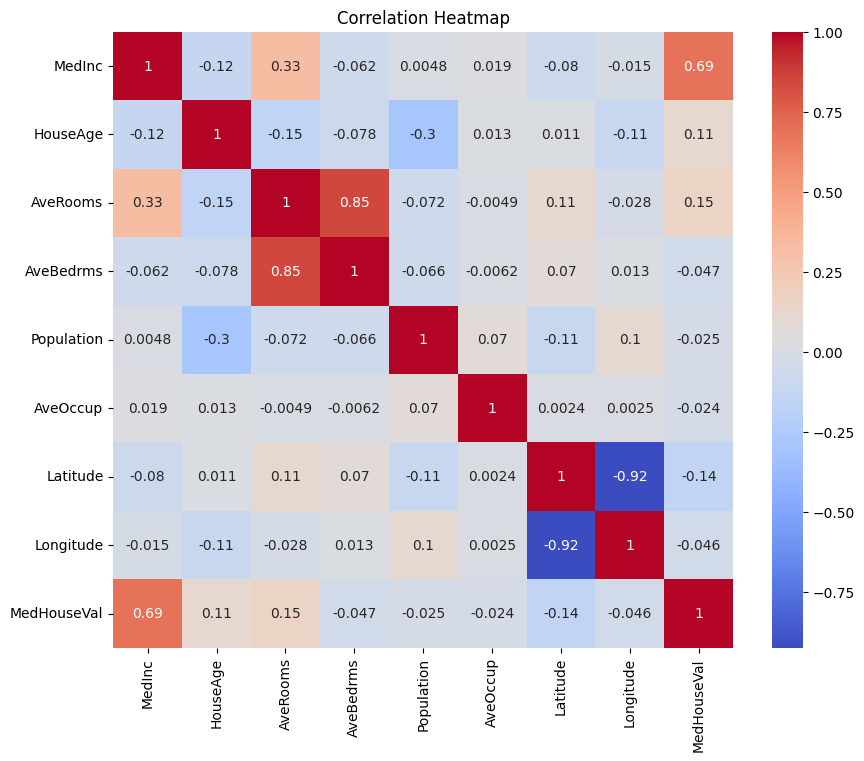

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

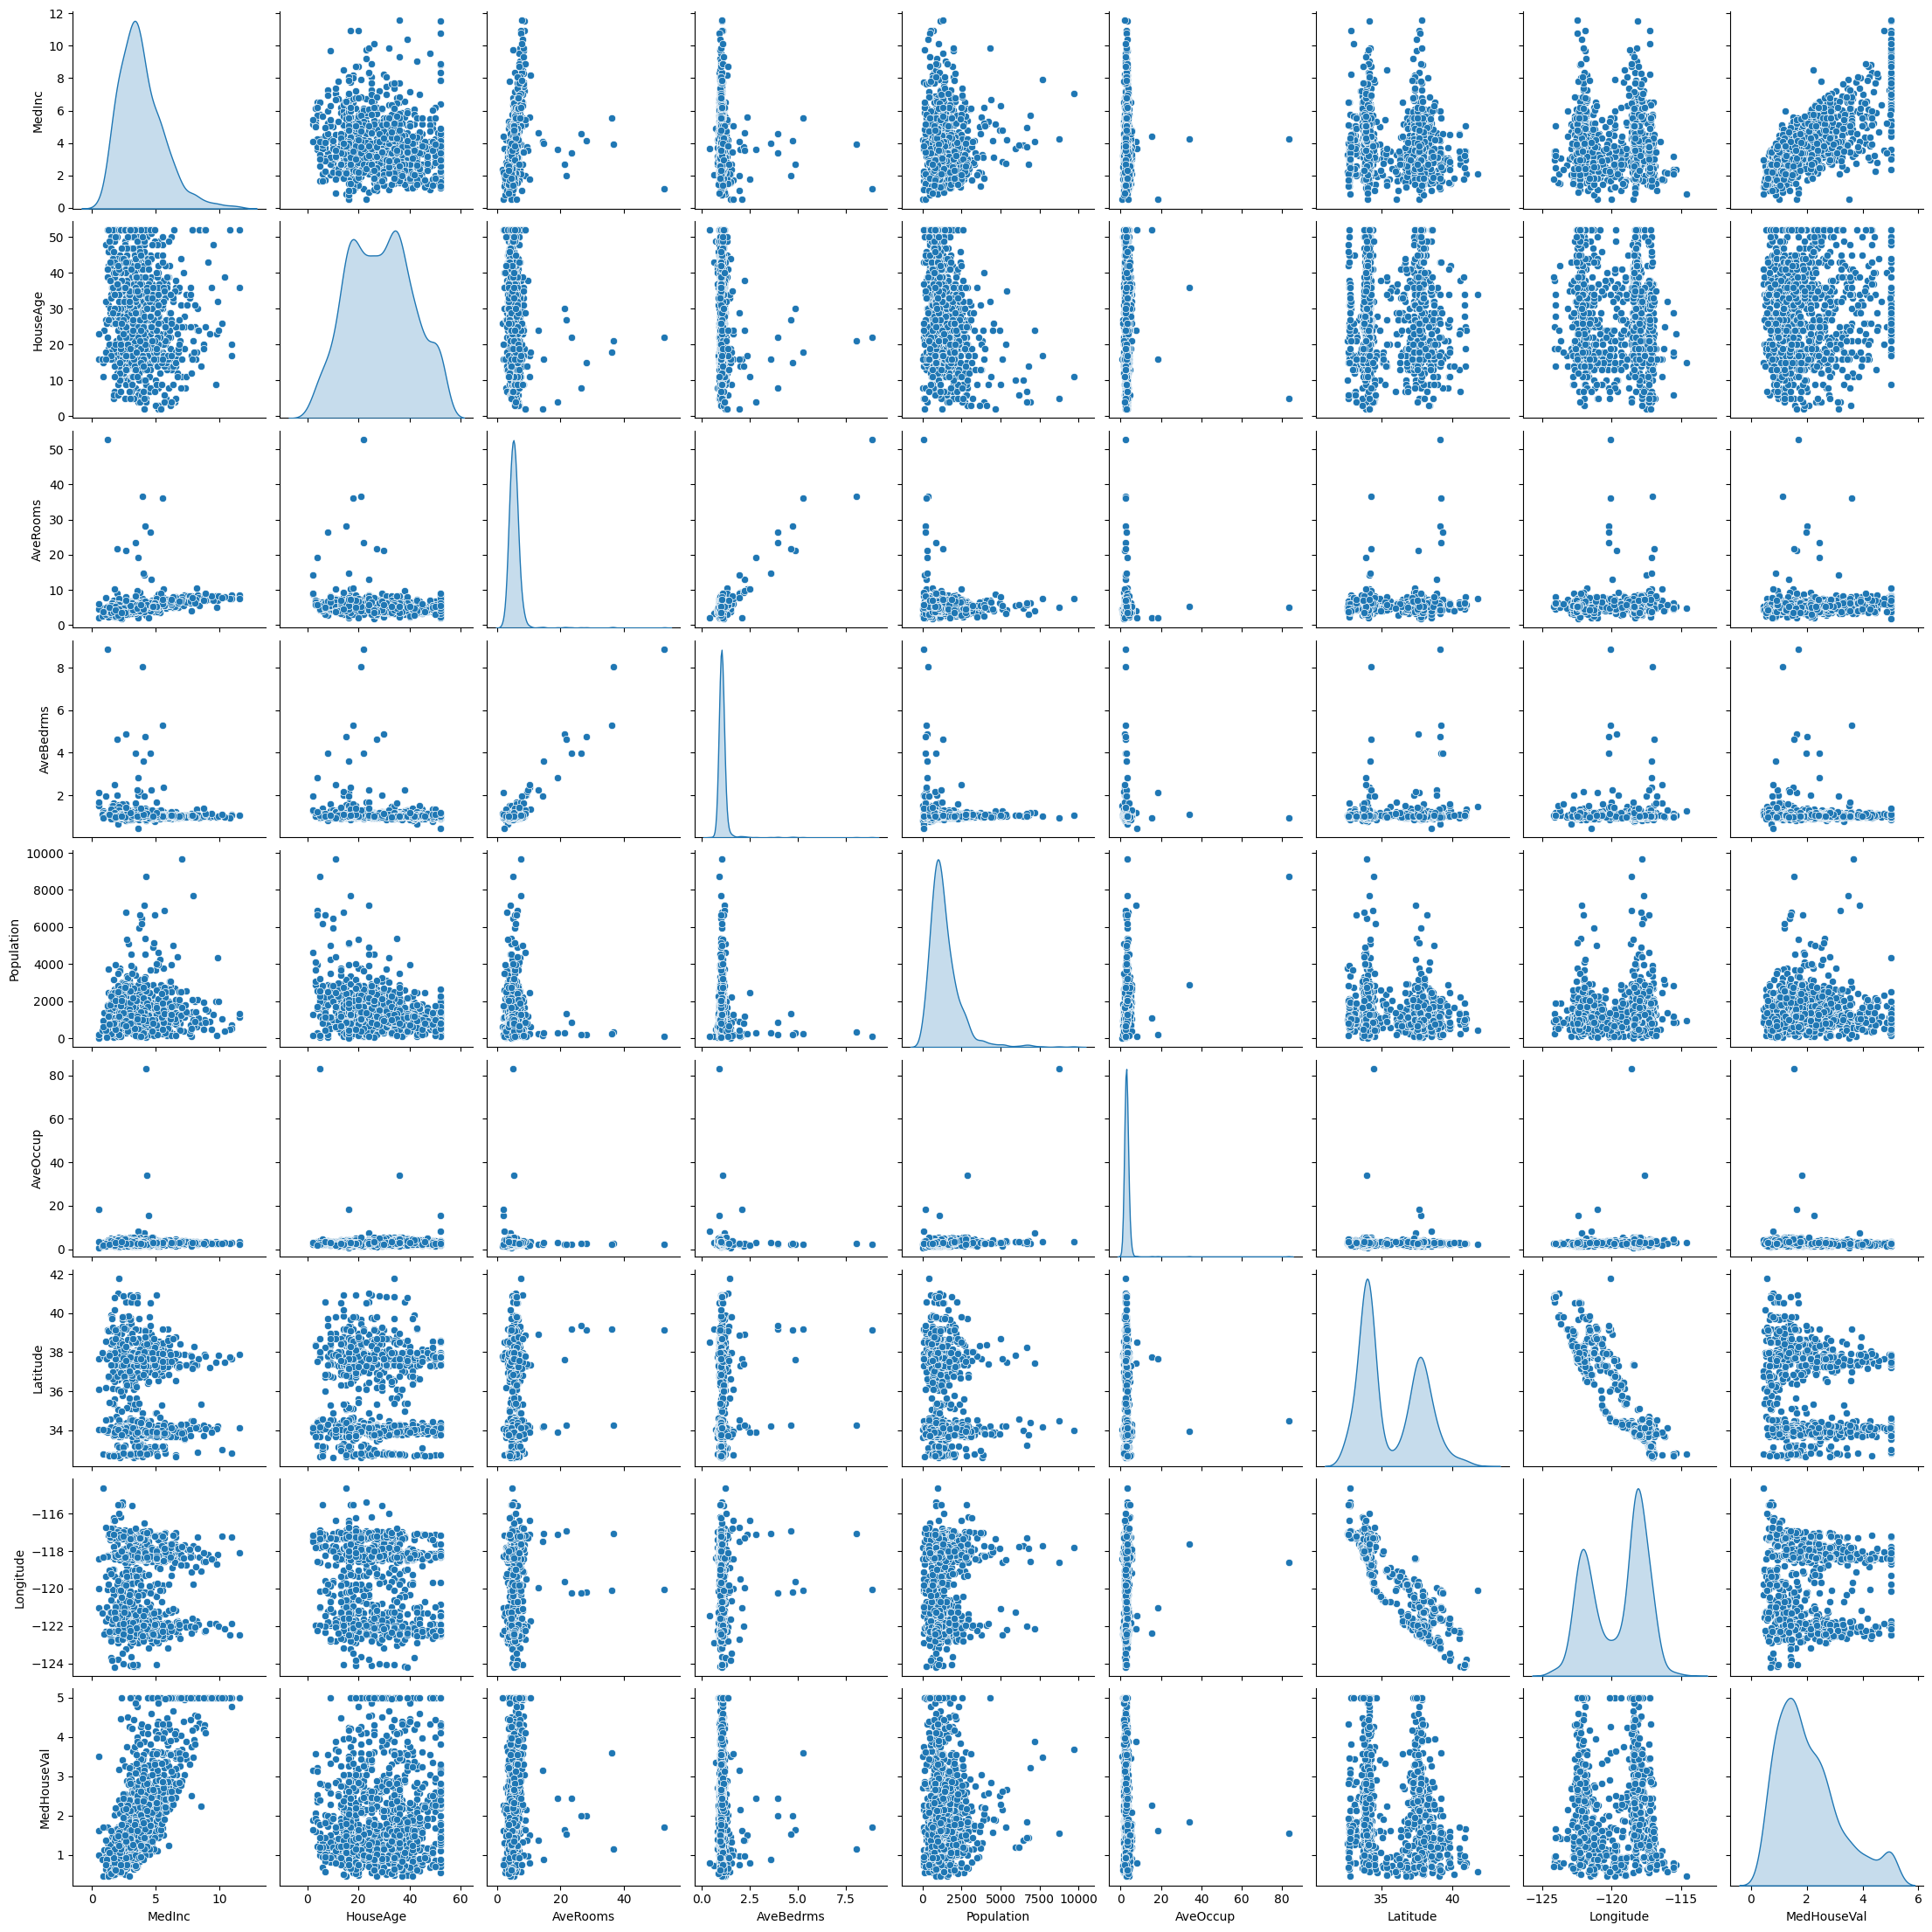

In [6]:
sns.pairplot(df.sample(1000), diag_kind='kde')
plt.show()

In [7]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df_imputed.isnull().sum())  # Check for remaining missing values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [8]:
scaler = StandardScaler()
numerical_features = df_imputed.select_dtypes(include=[np.number]).columns
df_imputed[numerical_features] = scaler.fit_transform(df_imputed[numerical_features])

In [9]:
encoder = OneHotEncoder(sparse_output=False)
categorical_features = df_imputed.select_dtypes(include=['object']).columns
encoded = encoder.fit_transform(df_imputed[categorical_features])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_features))
df_final = pd.concat([df_imputed.drop(columns=categorical_features), encoded_df], axis=1)

In [10]:
X = df_final.drop(columns=['MedHouseVal'])  # Replace with the actual target column
y = df_final['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (16512, 8)
Testing data shape: (4128, 8)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [14]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print("-" * 30)
    
    return model, rmse, mae, r2

In [15]:
lr_model = LinearRegression()
train_and_evaluate(lr_model, X_train, y_train, X_test, y_test)

Model: LinearRegression
RMSE: 0.6461
MAE: 0.4621
R²: 0.5758
------------------------------


(LinearRegression(),
 np.float64(0.6461245859158666),
 0.46207392160821764,
 0.5757877060324508)

In [16]:
dt_model = DecisionTreeRegressor(random_state=42)
train_and_evaluate(dt_model, X_train, y_train, X_test, y_test)

Model: DecisionTreeRegressor
RMSE: 0.6072
MAE: 0.3928
R²: 0.6253
------------------------------


(DecisionTreeRegressor(random_state=42),
 np.float64(0.6072246636750895),
 0.39284221172623507,
 0.6253294802078968)

In [17]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
train_and_evaluate(rf_model, X_train, y_train, X_test, y_test)

Model: RandomForestRegressor
RMSE: 0.4389
MAE: 0.2838
R²: 0.8042
------------------------------


(RandomForestRegressor(random_state=42),
 np.float64(0.4389199648703534),
 0.2838078315150398,
 0.8042411575257635)

In [18]:
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
train_and_evaluate(xgb_model, X_train, y_train, X_test, y_test)

Model: XGBRegressor
RMSE: 0.4089
MAE: 0.2683
R²: 0.8301
------------------------------


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...),
 np.float64(0.40885938329846216),
 0.2682778329268157,
 0.8301370526941086)

In [21]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", np.sqrt(-grid_search.best_score_))

# Train the best model
best_rf = grid_search.best_estimator_
train_and_evaluate(best_rf, X_train, y_train, X_test, y_test)

Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.44223336778351885
Model: RandomForestRegressor
RMSE: 0.4380
MAE: 0.2836
R²: 0.8051
------------------------------


(RandomForestRegressor(max_depth=30, n_estimators=150, random_state=42),
 np.float64(0.4379576582612578),
 0.283556643705316,
 0.8050985964067019)

In [22]:
# Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [23]:
# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.283556643705316
RMSE: 0.4379576582612578
R² Score: 0.8050985964067019


In [24]:
import pickle

# Assuming 'y_train' was scaled
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import t

# Example: Initialize reg, x_train, and y_train
# Replace this with your actual data and model
x_train = pd.DataFrame({
    'MedInc': [1, 2, 3],
    'HouseAge': [10, 20, 30],
    'AveRooms': [5, 6, 7],
    'AveBedrms': [1, 1.5, 2],
    'Population': [100, 200, 300],
    'AveOccup': [3, 4, 5],
    'Latitude': [34, 35, 36],
    'Longitude': [-118, -119, -120]
})
y_train = np.log([100000, 200000, 300000])  # Log-transform target variable
reg = LinearRegression().fit(x_train, y_train)

# Predict and calculate residuals
y_pred_train = reg.predict(x_train)
residuals = y_train - y_pred_train

# Calculate Residual Standard Deviation (RSD)
std_residuals = np.std(residuals)

# Number of samples
N = len(y_train)

# Standard error (SE)
SE = std_residuals / np.sqrt(N)

# Define confidence level and t-critical value
confidence_level = 0.90  # 90% CI
df_degrees = N - 2  # Degrees of freedom
t_critical = t.ppf((1 + confidence_level) / 2, df_degrees)

# Prediction function with confidence interval
def predict_price_ci(features, model, SE, t_critical):
    example_input = pd.DataFrame([features])
    predicted_price = model.predict(example_input)[0]
    margin_of_error = t_critical * SE
    lower_bound = predicted_price - margin_of_error
    upper_bound = predicted_price + margin_of_error
    return predicted_price, lower_bound, upper_bound

# Example feature values (replace with actual input)
features = {
    'MedInc': 6.5,
    'HouseAge': 30,
    'AveRooms': 5,
    'AveBedrms': 1,
    'Population': 1500,
    'AveOccup': 3,
    'Latitude': 35,
    'Longitude': -120
}

# Call the prediction function and display the results
predicted_price, lower_bound, upper_bound = predict_price_ci(features, reg, SE, t_critical)
print(f"Predicted Price: ${np.exp(predicted_price):.2f}")
print(f"90% Confidence Interval: [${np.exp(lower_bound):.2f}, ${np.exp(upper_bound):.2f}]")

Predicted Price: $214194493.04
90% Confidence Interval: [$167286865.48, $274255128.86]
